# Employee Attrition

## Aim: To predict whether the employed remain in his job or not.

### Description: 
#### The ML model used for this data predicts whether the employee should retained or not within a company. 
#### Features used:

- Age: Age of the employee(Integer type)
- Atrrition: Whether the employee is fired or not
- Business Travel: How often does the employee travel on business basis
- Daily rate: The amount payed to the employee daily i.e (Monthly Rate X 12) / Total working days in a year
- Department: Type of department the employee is working
- DistanceFromHome: The total distance from the employee's stay
- Education: Educational background
- EmployeeCount: Count of employee
- EmployeeNumber: Employee's unique number
- EnvironmentSatisfaction: Rate of environment satisfaction
- Gender: Gender of the employee
- HourlyRate: How much does the employee is payed on hourly based
- JobInvolvement: How well the employee is dedicated towards their job
- JobLevel: Level of the job
- JobRole: Role of the job
- JobSatisfaction: Employee's rating for his job satisfaction
- MartialStatus: Is employee married or not
- MonthlyIncome: Employee's fixed income per month
- MonthlyRate: Employee's total daily rate in a month
- NumCompaniesWorked: Number of companies does the employee worked in
- Over18: Is the employee is above 18 or not
- OverTime: Does the employee works overtime or not
- PercentSalaryHike: Increase in employee's salary in percentage
- PerformanceRating: Rating given for employee's overall performance
- RelationshipSatisfaction: How well the employee's relationship within organization/company
- StandardHours: A standard hour is the amount of work achievable, at the expected level of efficiency, in an hour
- StockOptionLevel: Level and the period of time granted to the employee to buy stocks 
- TotalWorkingYears: Number of years worked in their profession
- TrainingTimesLastYear: Number of times does the employee got trained in last year
- WorkLifeBalance: How well the employee balances their life
- YearsAtCompany: Number of years worked in the company
- YearsInCurrentRole: How many does the employee worked in a particular role
- YearsSinceLastPromotion: How many years are completed sinse their last promotion
- YearsWithCurrManager: How many does the employee worked under thier current manager

## Pipelines used:
- Exploratory Data Analysis 
- Feature Engineering *
- Feature selection *
- Model training and selection

## Feature Engineering

In [196]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [197]:
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',100)

In [198]:
data_frame=pd.read_csv('hr_data.csv')

In [199]:
data_frame

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8


### Handling imbalanced dataset

In [200]:
x=data_frame.drop(['Attrition','EmployeeCount','Over18'],axis=1)
y=data_frame['Attrition']

In [201]:
from imblearn.over_sampling import RandomOverSampler
oversample= RandomOverSampler (sampling_strategy='minority')
over_sam_x,over_sam_y=oversample.fit_resample(x, y)

In [202]:
data_frame=pd.concat([over_sam_x,over_sam_y],axis=1)

### Missing values

In [203]:
data_frame.isnull().sum()

Age                         0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
Attrition                   0
dtype: int

### Splitting the data into numerical and categorical data

In [204]:
categorical_features=[]
numerical_features=[]
for cols in data_frame.columns:
    if data_frame[cols].dtype=='O':
        categorical_features.append(cols)
    else:
        numerical_features.append(cols)

In [205]:
#dataframe with categorical features
data_frame[categorical_features]

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime,Attrition
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Yes,Yes
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,No,No
2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Yes,Yes
3,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Yes,No
4,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,No,No
...,...,...,...,...,...,...,...,...
2461,Travel_Rarely,Sales,Life Sciences,Male,Sales Representative,Married,No,Yes
2462,Travel_Frequently,Sales,Life Sciences,Male,Sales Executive,Divorced,No,Yes
2463,Travel_Frequently,Research & Development,Life Sciences,Male,Manufacturing Director,Single,No,Yes
2464,Travel_Rarely,Research & Development,Other,Female,Research Scientist,Single,No,Yes


### Converting categorical features into numerical features

In [206]:
#performing one hot encoding to label the categorical values in the dataframe.
for cols in categorical_features:
    rank=data_frame[cols].value_counts(ascending=True).index
    mapping={i:k for k,i in enumerate(rank,0)}
    print(cols,':-')
    print('----------------------')
    feature_unique_values=data_frame[cols].unique()
    labels=data_frame[cols].map(mapping).unique()
    for i,j in zip(feature_unique_values,labels):
        print('{}:{}'.format(i,j))
    print('--------------------------------------------------------------')
    data_frame[cols]=data_frame[cols].map(mapping)

BusinessTravel :-
----------------------
Travel_Rarely:2
Travel_Frequently:1
Non-Travel:0
--------------------------------------------------------------
Department :-
----------------------
Sales:1
Research & Development:2
Human Resources:0
--------------------------------------------------------------
EducationField :-
----------------------
Life Sciences:5
Other:1
Medical:4
Marketing:3
Technical Degree:2
Human Resources:0
--------------------------------------------------------------
Gender :-
----------------------
Female:0
Male:1
--------------------------------------------------------------
JobRole :-
----------------------
Sales Executive:8
Research Scientist:6
Laboratory Technician:7
Manufacturing Director:4
Healthcare Representative:3
Manager:2
Sales Representative:5
Research Director:0
Human Resources:1
--------------------------------------------------------------
MaritalStatus :-
----------------------
Single:1
Married:2
Divorced:0
-------------------------------------------

In [207]:
data_frame.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,41,2,1102,1,1,2,5,1,2,0,94,3,2,8,4,1,5993,19479,8,0,11,3,1,80,0,8,0,1,6,4,0,5,0
1,49,1,279,2,8,1,5,2,3,1,61,2,2,6,2,2,5130,24907,1,1,23,4,4,80,1,10,3,3,10,7,1,7,1
2,37,2,1373,2,2,2,1,4,4,1,92,2,1,7,3,1,2090,2396,6,0,15,3,2,80,0,7,3,3,0,0,0,0,0
3,33,1,1392,2,3,4,5,5,4,0,56,3,1,6,3,2,2909,23159,1,0,11,3,3,80,0,8,3,3,8,7,3,0,1
4,27,2,591,2,2,1,4,7,1,1,40,3,1,7,2,2,3468,16632,9,1,12,3,4,80,1,6,3,3,2,2,2,2,1


In [208]:
#numerical featuers
data_frame[numerical_features]

,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,1,2,94,3,2,4,5993,19479,8,11,3,1,80,0,8,0,1,6,4,0,5
1,49,279,8,1,2,3,61,2,2,2,5130,24907,1,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1373,2,2,4,4,92,2,1,3,2090,2396,6,15,3,2,80,0,7,3,3,0,0,0,0
3,33,1392,3,4,5,4,56,3,1,3,2909,23159,1,11,3,3,80,0,8,3,3,8,7,3,0
4,27,591,2,1,7,1,40,3,1,2,3468,16632,9,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2461,25,383,9,2,1439,1,68,2,1,1,4400,15182,3,12,3,1,80,0,6,2,3,3,2,2,2
2462,50,878,1,4,2044,2,94,3,2,3,6728,14255,7,12,3,4,80,2,12,3,3,6,3,0,1
2463,51,1150,8,4,179,1,53,1,3,4,10650,25150,2,15,3,4,80,0,18,2,3,4,2,0,3
2464,21,1427,18,1,923,4,65,3,1,4,2693,8870,1,19,3,1,80,0,1,3,2,1,0,0,0


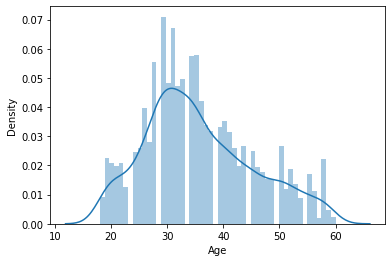

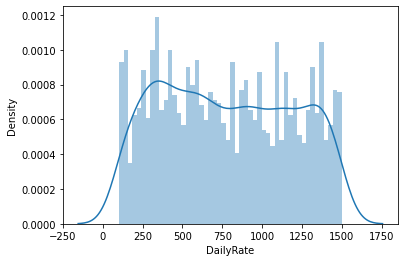

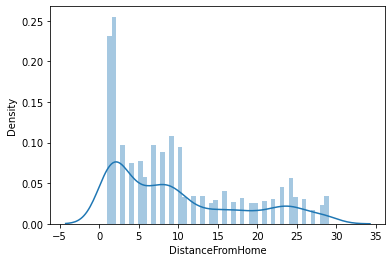

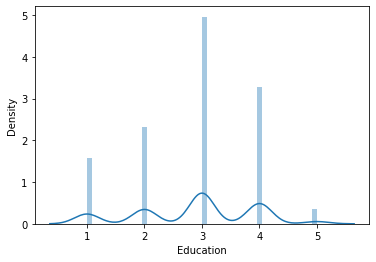

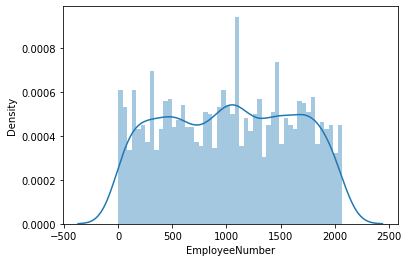

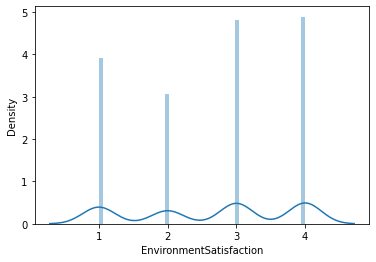

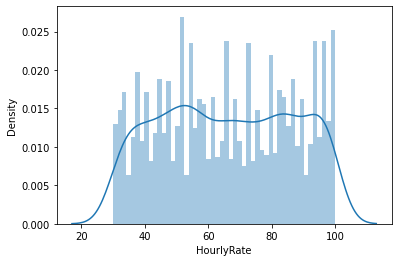

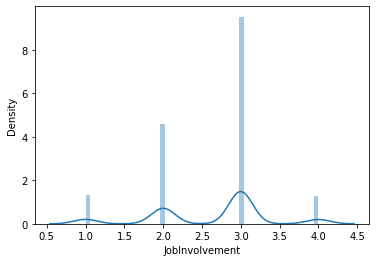

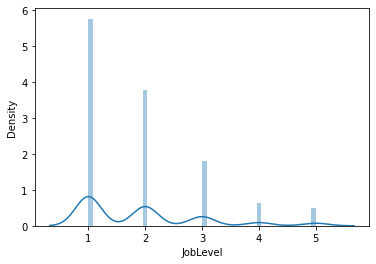

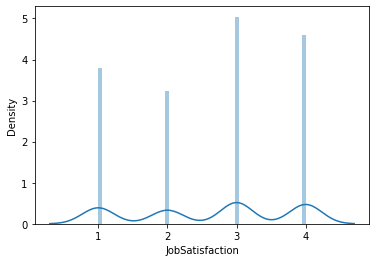

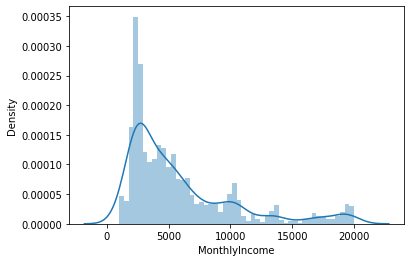

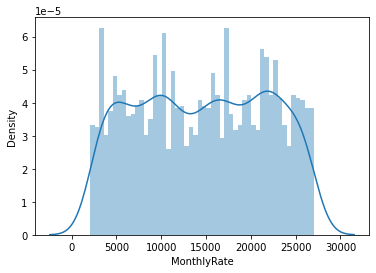

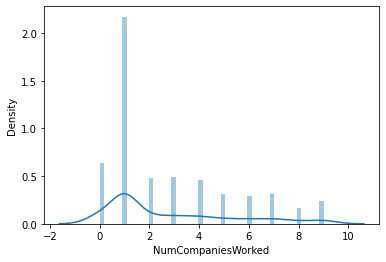

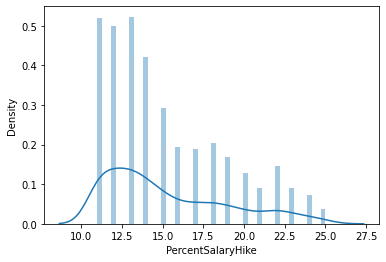

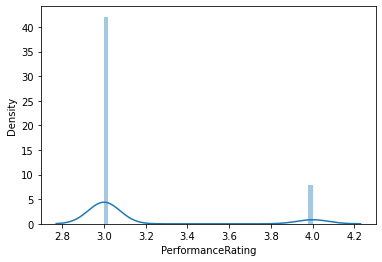

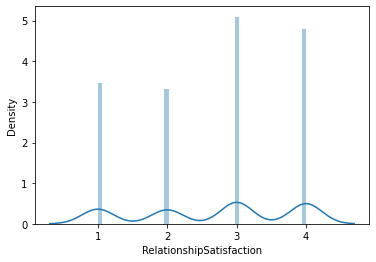

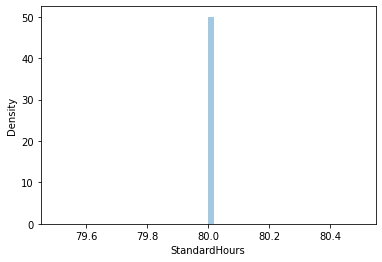

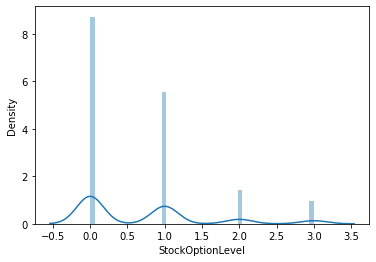

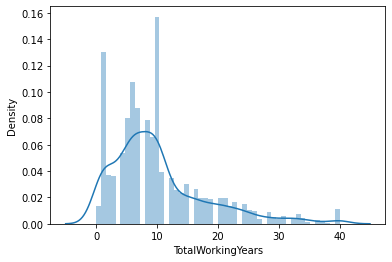

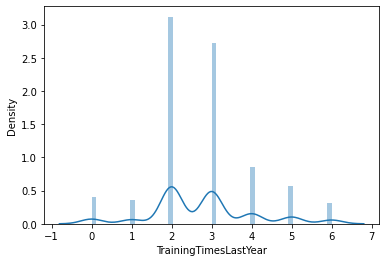

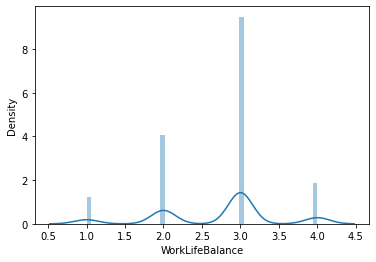

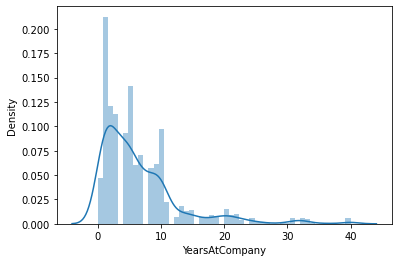

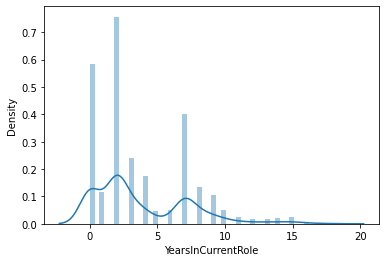

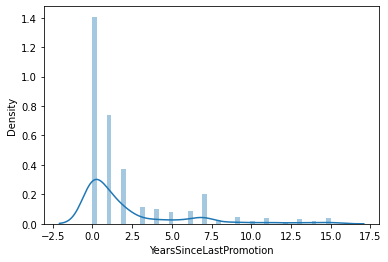

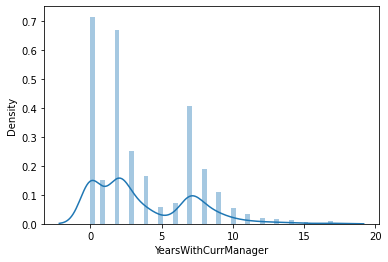

In [209]:
#finding the distribution of the features
for i,cols in enumerate(numerical_features):
    plt.figure(i)
    sns.distplot(data_frame[cols],bins=50)

### Finding the outliers for continuos features

In [210]:
continuos_features=['MonthlyIncome', 'DailyRate', 'MonthlyRate']

In [211]:
for cols in continuos_features:
    if 0 in data_frame[cols].unique():
        print(cols)

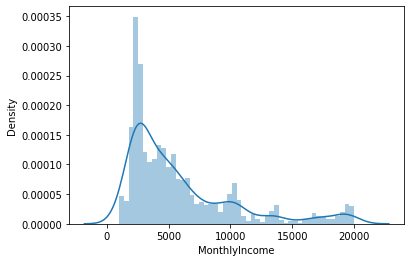

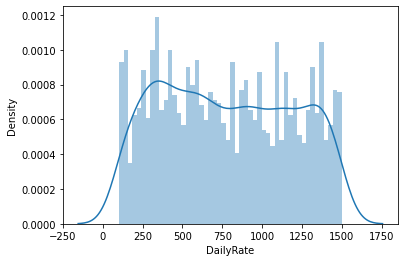

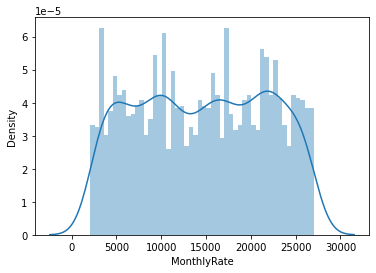

In [212]:
for cols in continuos_features:
    sns.distplot(data_frame[cols],bins=50)
    plt.show()

In [213]:
for cols in continuos_features:
    import plotly.express as px
    fig = px.box(data_frame[cols])
    fig.show()

### Transforming the values of MonthlyIncome to log values

<AxesSubplot:xlabel='MonthlyIncome', ylabel='Density'>

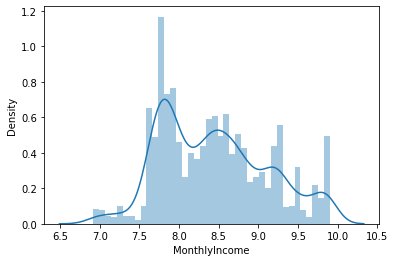

In [214]:
temp=np.log(data_frame['MonthlyIncome'])
sns.distplot(temp,bins=40)

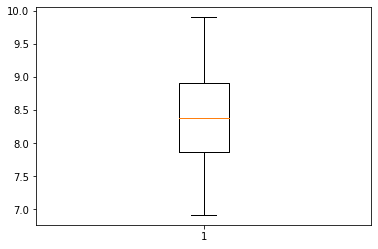

In [215]:
plt.boxplot(temp);

In [216]:
#After transforming the values, there are no outliers for MonthlyIncome

In [217]:
#transforming the values in data_frame['MonthlyIncome']
data_frame['MonthlyIncome']=np.log(data_frame['MonthlyIncome'])

### Scaling the values

In [218]:
from sklearn.preprocessing import MinMaxScaler

In [219]:
#scaling the values using MinMaxScaler
scaler=MinMaxScaler()
x=data_frame.drop(['Attrition'],axis=1)
scaler.fit(x)
input_values=scaler.transform(x)

In [220]:
#converting the scaled values into dataframe by assigning input dataframe features
final_data=pd.DataFrame(input_values,columns=x.columns)

In [221]:
final_data

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.547619,1.0,0.715820,0.5,0.000000,0.25,1.0,0.000000,0.333333,0.0,0.914286,0.666667,0.25,1.000,1.000000,0.5,0.596518,0.698053,0.888889,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.200,0.000000,0.000000,0.150,0.222222,0.000000,0.294118
1,0.738095,0.5,0.126700,1.0,0.250000,0.00,1.0,0.000484,0.666667,1.0,0.442857,0.333333,0.25,0.750,0.333333,1.0,0.544458,0.916001,0.111111,1.0,0.857143,1.0,1.000000,0.0,0.333333,0.250,0.500000,0.666667,0.250,0.388889,0.066667,0.411765
2,0.452381,1.0,0.909807,1.0,0.035714,0.25,0.2,0.001451,1.000000,1.0,0.885714,0.333333,0.00,0.875,0.666667,0.5,0.243814,0.012126,0.666667,0.0,0.285714,0.0,0.333333,0.0,0.000000,0.175,0.500000,0.666667,0.000,0.000000,0.000000,0.000000
3,0.357143,0.5,0.923407,1.0,0.071429,0.75,1.0,0.001935,1.000000,0.0,0.371429,0.666667,0.00,0.750,0.666667,1.0,0.354519,0.845814,0.111111,0.0,0.000000,0.0,0.666667,0.0,0.000000,0.200,0.500000,0.666667,0.200,0.388889,0.200000,0.000000
4,0.214286,1.0,0.350036,1.0,0.035714,0.00,0.8,0.002903,0.000000,1.0,0.142857,0.666667,0.00,0.875,0.333333,1.0,0.413369,0.583738,1.000000,1.0,0.071429,0.0,1.000000,0.0,0.333333,0.150,0.500000,0.666667,0.050,0.111111,0.133333,0.117647
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2461,0.166667,1.0,0.201145,0.5,0.285714,0.25,1.0,0.695694,0.000000,1.0,0.542857,0.333333,0.00,0.625,0.000000,1.0,0.493064,0.525517,0.333333,1.0,0.071429,0.0,0.000000,0.0,0.000000,0.150,0.333333,0.666667,0.075,0.111111,0.133333,0.117647
2462,0.761905,0.5,0.555476,0.5,0.000000,0.75,1.0,0.988389,0.333333,1.0,0.914286,0.666667,0.25,1.000,0.666667,0.0,0.635251,0.488296,0.777778,1.0,0.071429,0.0,1.000000,0.0,0.666667,0.300,0.500000,0.666667,0.150,0.166667,0.000000,0.058824
2463,0.785714,0.5,0.750179,1.0,0.250000,0.75,1.0,0.086115,0.000000,1.0,0.328571,0.000000,0.50,0.500,1.000000,0.5,0.789025,0.925758,0.222222,1.0,0.285714,0.0,1.000000,0.0,0.000000,0.450,0.333333,0.666667,0.100,0.111111,0.000000,0.176471
2464,0.071429,1.0,0.948461,1.0,0.607143,0.00,0.2,0.446057,1.000000,0.0,0.500000,0.666667,0.00,0.750,1.000000,0.5,0.328687,0.272074,0.111111,1.0,0.571429,0.0,0.000000,0.0,0.000000,0.025,0.500000,0.333333,0.025,0.000000,0.000000,0.000000


In [222]:
#Replacing the values in Attrition from 0 to 1 and 1 to 0
final_data['Attrition']=data_frame['Attrition']
final_data['Attrition']=final_data['Attrition'].replace([0,1],[1,0])

In [223]:
final_data.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,0.547619,1.0,0.715820,0.5,0.000000,0.25,1.0,0.000000,0.333333,0.0,0.914286,0.666667,0.25,1.000,1.000000,0.5,0.596518,0.698053,0.888889,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.200,0.0,0.000000,0.15,0.222222,0.000000,0.294118,1
1,0.738095,0.5,0.126700,1.0,0.250000,0.00,1.0,0.000484,0.666667,1.0,0.442857,0.333333,0.25,0.750,0.333333,1.0,0.544458,0.916001,0.111111,1.0,0.857143,1.0,1.000000,0.0,0.333333,0.250,0.5,0.666667,0.25,0.388889,0.066667,0.411765,0
2,0.452381,1.0,0.909807,1.0,0.035714,0.25,0.2,0.001451,1.000000,1.0,0.885714,0.333333,0.00,0.875,0.666667,0.5,0.243814,0.012126,0.666667,0.0,0.285714,0.0,0.333333,0.0,0.000000,0.175,0.5,0.666667,0.00,0.000000,0.000000,0.000000,1
3,0.357143,0.5,0.923407,1.0,0.071429,0.75,1.0,0.001935,1.000000,0.0,0.371429,0.666667,0.00,0.750,0.666667,1.0,0.354519,0.845814,0.111111,0.0,0.000000,0.0,0.666667,0.0,0.000000,0.200,0.5,0.666667,0.20,0.388889,0.200000,0.000000,0
4,0.214286,1.0,0.350036,1.0,0.035714,0.00,0.8,0.002903,0.000000,1.0,0.142857,0.666667,0.00,0.875,0.333333,1.0,0.413369,0.583738,1.000000,1.0,0.071429,0.0,1.000000,0.0,0.333333,0.150,0.5,0.666667,0.05,0.111111,0.133333,0.117647,0


In [224]:
x_final=final_data.drop(['Attrition'],axis=1)
y_final=final_data[['Attrition']]

## Feature selection

## SelectKBest model

In [225]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
bestfeatures = SelectKBest (score_func=chi2, k=10)
fit = bestfeatures.fit(x_final,y_final)
dfscores = pd.DataFrame (fit.scores_)
dfcolumns = pd.DataFrame(x_final.columns)
featureScores = pd.concat([dfcolumns, dfscores], axis=1)
featureScores.columns = ['Specs', 'Score1']
featureScores

,Specs,Score1
0,Age,12.590001
1,BusinessTravel,0.010194
2,DailyRate,3.025444
3,Department,2.751162
4,DistanceFromHome,7.298129
5,Education,0.700517
6,EducationField,2.945987
7,EmployeeNumber,0.005164
8,EnvironmentSatisfaction,8.708467
9,Gender,0.817211


In [226]:
sorted_data_fs=featureScores.sort_values(by='Score1',ascending=False)

## ExtraTreesClassifier

In [227]:
from sklearn.ensemble import ExtraTreesClassifier

In [228]:
model=ExtraTreesClassifier()
model.fit(x_final,y_final)

ExtraTreesClassifier()

In [229]:
scores=model.feature_importances_

In [230]:
etc_df=pd.DataFrame({'Feature':x_final.columns,'Score2':scores})

In [231]:
sorted_data_etc_df=etc_df.sort_values('Score2',ascending=False)

In [232]:
pd.concat([sorted_data_fs,sorted_data_etc_df],axis=1).sort_values('Score1',ascending=False)

,Specs,Score1,Feature,Score2
19,OverTime,92.388375,OverTime,0.082273
12,JobLevel,39.069463,JobLevel,0.036595
24,StockOptionLevel,33.289751,StockOptionLevel,0.039601
31,YearsWithCurrManager,19.253613,YearsWithCurrManager,0.030758
29,YearsInCurrentRole,16.981422,YearsInCurrentRole,0.030375
25,TotalWorkingYears,16.689462,TotalWorkingYears,0.037685
16,MonthlyIncome,16.054665,MonthlyIncome,0.041386
0,Age,12.590001,Age,0.042558
14,JobSatisfaction,11.751953,JobSatisfaction,0.038215
13,JobRole,8.792096,JobRole,0.038007


### Choosing the features which have scores greater than 0 from SelectKBest model

In [233]:
final_features=[]
for cols,score in zip(featureScores['Specs'],featureScores['Score1']):
    if score>=1:
        final_features.append(cols)

In [234]:
final_input_df=final_data[final_features]
final_input_df['Attrition']=final_data['Attrition']

In [235]:
final_input_df.head()

,Age,DailyRate,Department,DistanceFromHome,EducationField,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,OverTime,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager,Attrition
0,0.547619,0.715820,0.5,0.000000,1.0,0.333333,0.666667,0.25,1.000,1.000000,0.596518,0.888889,0.0,0.000000,0.000000,0.200,0.000000,0.15,0.222222,0.294118,1
1,0.738095,0.126700,1.0,0.250000,1.0,0.666667,0.333333,0.25,0.750,0.333333,0.544458,0.111111,1.0,1.000000,0.333333,0.250,0.666667,0.25,0.388889,0.411765,0
2,0.452381,0.909807,1.0,0.035714,0.2,1.000000,0.333333,0.00,0.875,0.666667,0.243814,0.666667,0.0,0.333333,0.000000,0.175,0.666667,0.00,0.000000,0.000000,1
3,0.357143,0.923407,1.0,0.071429,1.0,1.000000,0.666667,0.00,0.750,0.666667,0.354519,0.111111,0.0,0.666667,0.000000,0.200,0.666667,0.20,0.388889,0.000000,0
4,0.214286,0.350036,1.0,0.035714,0.8,0.000000,0.666667,0.00,0.875,0.333333,0.413369,1.000000,1.0,1.000000,0.333333,0.150,0.666667,0.05,0.111111,0.117647,0


In [236]:
#saving the final_input_df to csv
final_input_df.to_csv('final_input_df.csv',index=False)